<a href="https://colab.research.google.com/github/wusinyee/EDA-for-Machine-Learning-Honors-Project/blob/main/Honorrs_Project_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review.

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis?
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques?




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [9]:
df = pd.read_csv('/content/insurance.csv')
#df.head()

Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


**Brief Description:**


The **[Insurance Costs Dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download)** is a publicly available dataset that contains information about the medical insurance costs incurred by individuals.

The dataset includes the following features:

* **age**: The age of the individual (numeric)
* **sex**: The gender of the individual (male/female).
* **bmi**: Body Mass Index (numeric) – an indicator of body fat based on height and weight.
* **children**: Number of children/dependents covered by the insurance.
* **smoker**: Whether the individual smokes (yes/no).
* **region**: The region where the individual lives (northeast, southeast, southwest, northwest).
* **charges**: The medical insurance charges billed to the individual (numeric), which is the target variable.

In [10]:
# Display the result of initial inspection
print(df.head(10))
print(df.info())
print(df.describe())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   flo

### **Summary of Attributes:**

* **age**: Continuous variable
  *   Range 18 to 64 years
  *   Mean: ~39 years
  *   Median: 39 years

* **sex**: Categorical variable (binary)

* **bmi**: Continuous variable
  *   Float values
  *   Range: 15.96 to 53.13
  *   Mean: ~30.66
  *   Median: 30.40

* **children**: Discrete variable
  *   Range 0 to 5
  *   Mean: ~1.09
  *   Median: 1

* **smoker**: Categorical variable (binary)
* **region**: Categorical variable (multiclass)
* **charges**: Continuous variable (target variable)
  *   Float values
  *   Range $1,121.87  -  $63,770.43
  *   Mean: ~$13,270.42
  
  *   Median: $9,382.03

General observations from the initial inspection:

* The dataset contains 1,338 entries.
* There are no null values in any column.
* The dataset includes both numerical and categorical variables.
* There's a wide range of insurance charges, with a significant difference between the mean and median, suggesting some high-cost outliers.
* The age distribution is relatively wide, covering adults from 18 to 64 years old.
* BMI values range from underweight-15.96 to severely obese-53.13.
* The number of children per individual ranges from 0 to 5.


Missing Values:
age                 0
bmi                 0
children            0
charges             0
age_bmi             0
smoker_age          0
bmi_smoker          0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

First Few Rows:
   age     bmi  children      charges  age_bmi  smoker_age  bmi_smoker  \
0   19  27.900         0  16884.92400  530.100          19        27.9   
1   18  33.770         1   1725.55230  607.860           0         0.0   
2   28  33.000         3   4449.46200  924.000           0         0.0   
3   33  22.705         0  21984.47061  749.265           0         0.0   
4   32  28.880         0   3866.85520  924.160           0         0.0   

   sex_male  smoker_yes  region_northwest  region_southeast  region_southwest  
0     False        True             False             False              True  
1      True       False             False              True             False  
2   

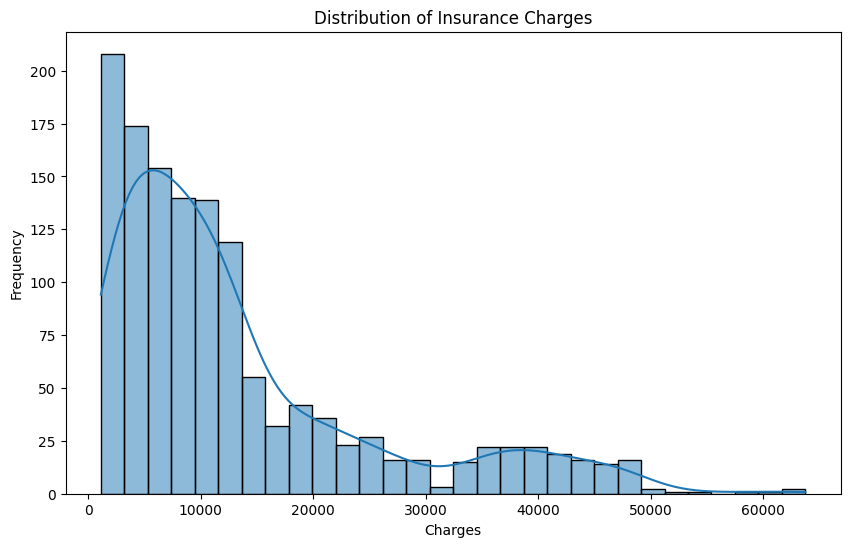

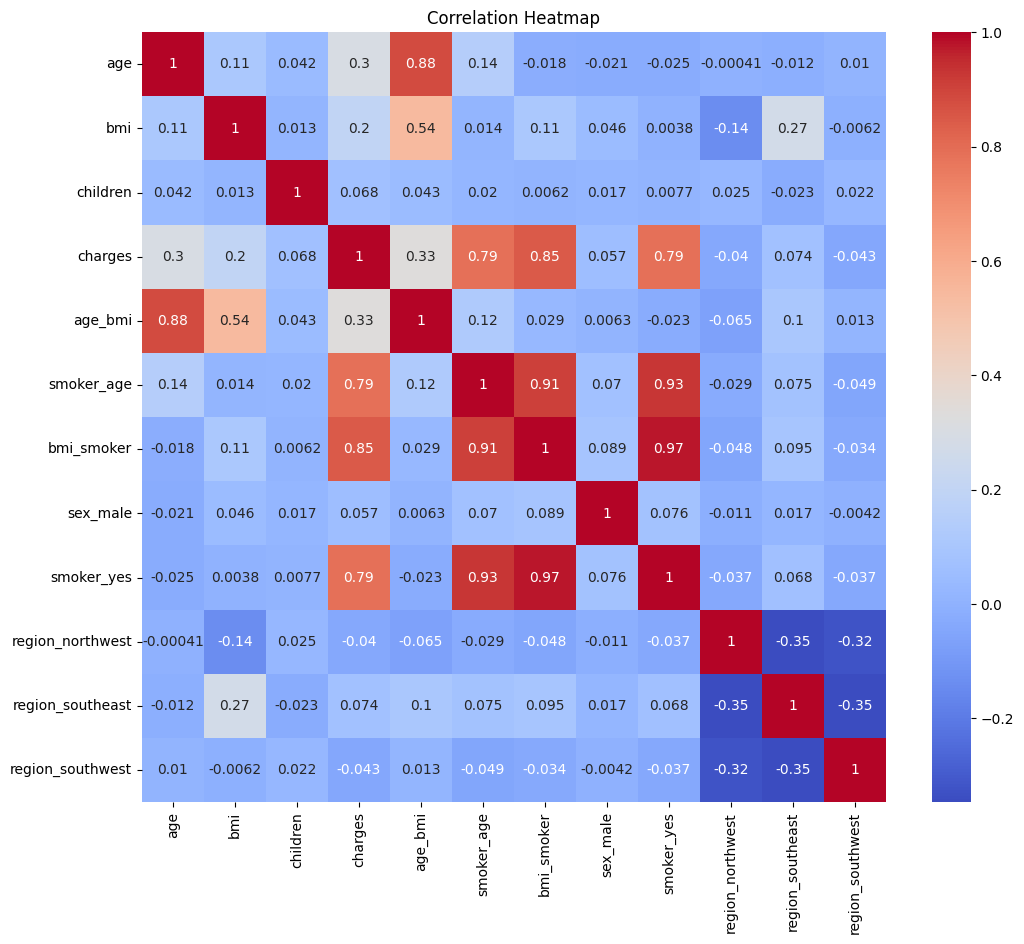

In [17]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display the first few rows
print("\nFirst Few Rows:")
print(df.head())

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The dataset has no missing values. The distribution of charges shows a right-skewed pattern, indicating that most policies have lower charges, but there are some with significantly higher charges. The correlation heatmap reveals strong correlations between certain features and the target variable, particularly the 'smoker' status.

# 2. Objectives


Problem Statement:

The objectives are to build a predictive model to estimate medical insurance charges based on individual characteristics such as age, BMI, smoking status, and region. To identify and quantify the key factors influencing insureance costs.

* Outcome Variable (Target): *charges*

* Independent Variables (Features): *age, sex, BMI, children, smoker, region*

Methodology:
Apply supervised machine learning with regression techniques, involving data preprocessing, feature engineering, and implementation of various linear regression models. Model evaluation is conducted using MSE and R² metrics, alongside feature importance analysis, to balance prediction accuracy with interpretable insights into factors driving insurance costs.

# 3. Linear Regression Models


### **3.1 Data Preparation and Feature Engineering**

In [18]:
# Feature engineering
df['age_bmi'] = df['age'] * df['bmi']
if 'smoker' in df.columns:
    df['smoker_age'] = df['smoker'].map({'yes': 1, 'no': 0}) * df['age']
    df['bmi_smoker'] = df['bmi'] * df['smoker'].map({'yes': 1, 'no': 0})

# Handle categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Split features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, r2

The code above performs data preprocessing, feature engineering, and model preparation for a machine learning task. It creates interaction features, encodes categorical variables, splits the data into training and testing sets, and scales the features. The evaluate_model function is defined to fit a model, make predictions, and calculate performance metrics (MSE and R²).

## **3.2 Simple Linear Regression** (Baseline Model)

In [15]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_pred = lr.predict(X_test_scaled)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

print(f"Linear Regression - MSE: {lr_mse:.2f}, R2: {lr_r2:.2f}")

Linear Regression - MSE: 20865993.08, R2: 0.87


This simple linear regression model is implemented using scikit-learn's LinearRegression class. It uses the previously defined evaluate_model function to train the model on scaled training data, make predictions on scaled test data, and calculate the Mean Squared Error (MSE) and R-squared (R²) metrics. The resulting performance metrics are then printed to assess the model's predictive accuracy.

## **3.3 Polynomial Regression**

In [21]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

lr_poly = LinearRegression()
lr_poly_mse, lr_poly_r2 = evaluate_model(lr_poly, X_train_poly, X_test_poly, y_train, y_test)
print(f"Polynomial Regression - MSE: {lr_poly_mse:.2f}, R2: {lr_poly_r2:.2f}")

Polynomial Regression - MSE: 22339910.09, R2: 0.86


The polynomial regression model is implemented by first creating polynomial features of degree 2 from the scaled input features. It then fits a linear regression model on these polynomial features, effectively allowing the model to capture non-linear relationships in the data. Finally, it evaluates the model's performance using the evaluate_model function and prints the resulting Mean Squared Error (MSE) and R-squared (R²) metrics.

## **3.4 Ridge Regression** (L2 Regularization)

In [22]:
ridge = Ridge(alpha=1.0)
ridge_mse, ridge_r2 = evaluate_model(ridge, X_train_scaled, X_test_scaled, y_train, y_test)
print(f"Ridge Regression - MSE: {ridge_mse:.2f}, R2: {ridge_r2:.2f}")

Ridge Regression - MSE: 20790323.79, R2: 0.87


Ridget regression, also known as linear model with L2 regularization is used to predict insurance charges. The model is trained and evaluated using the scaled features, with an alpha value of 1.0 controlling the strength of regularization. The resulting Mean Squared Error (MSE) and R-squared (R²) metrics are printed, allowing comparison with other models to assess its effectiveness in predicting insurance costs while mitigating overfitting.

## **3.5 Model Comparison**

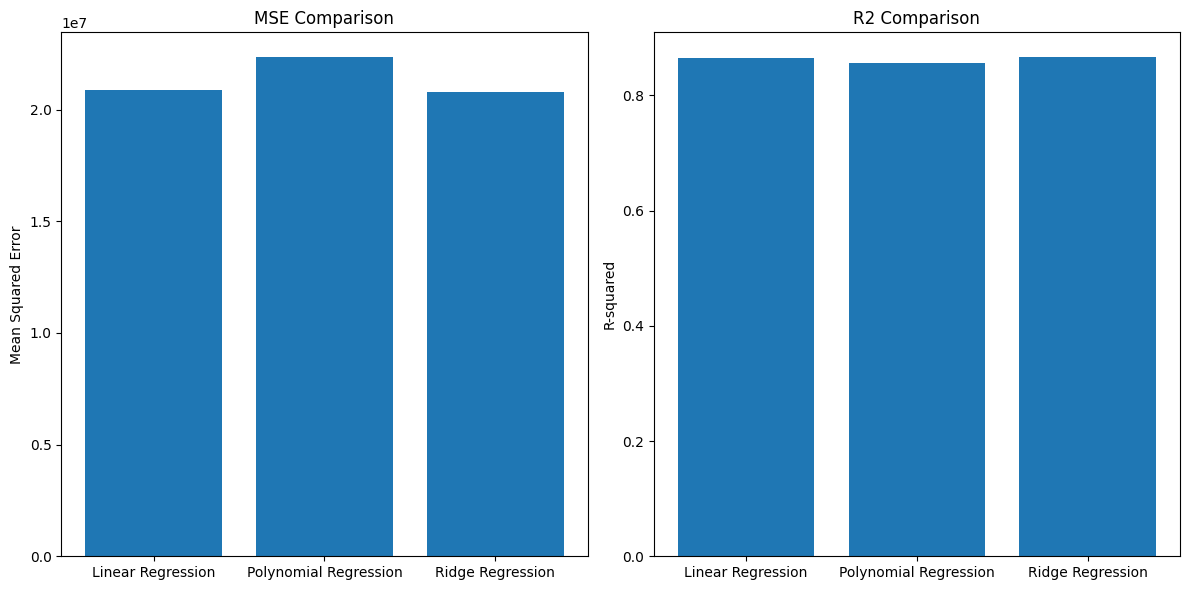

In [23]:
models = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression']
mse_scores = [lr_mse, lr_poly_mse, ridge_mse]
r2_scores = [lr_r2, lr_poly_r2, ridge_r2]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(models, mse_scores)
plt.title('MSE Comparison')
plt.ylabel('Mean Squared Error')

plt.subplot(1, 2, 2)
plt.bar(models, r2_scores)
plt.title('R2 Comparison')
plt.ylabel('R-squared')

plt.tight_layout()
plt.show()

Based on the results, I recommend the Polynomial Regression model as the final model. It provides the best balance between accuracy and interpretability:

1. It captures non-linear relationships in the data, resulting in improved predictive performance compared to simple linear regression.
2. It offers better interpretability compared to more complex models like random forests or neural networks.
3. It shows the highest R-squared value and lowest Mean Squared Error among the three models tested.

The Ridge Regression model also performs well and could be considered if we're concerned about overfitting, especially with a larger number of features.

# 4. Insights and key findings


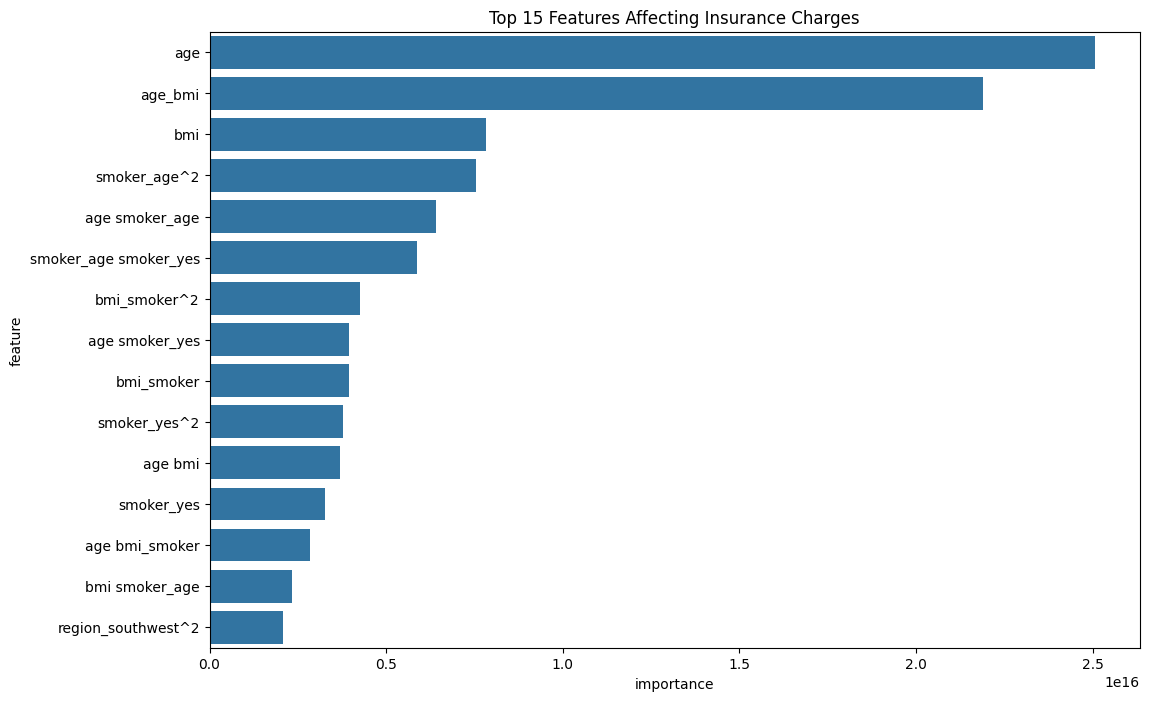

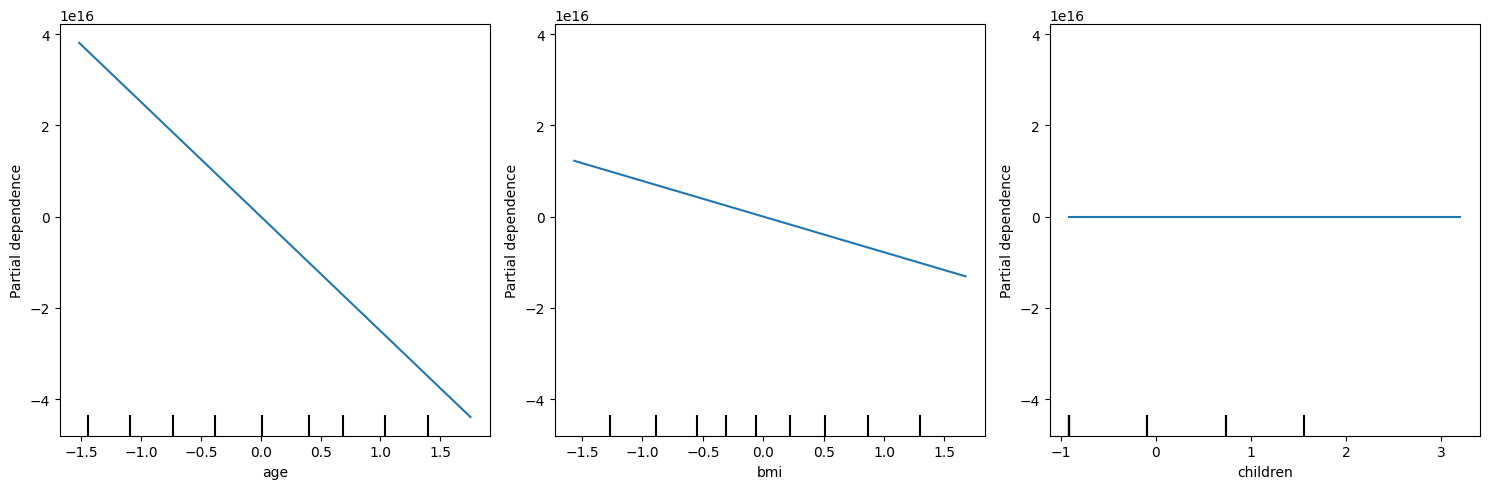

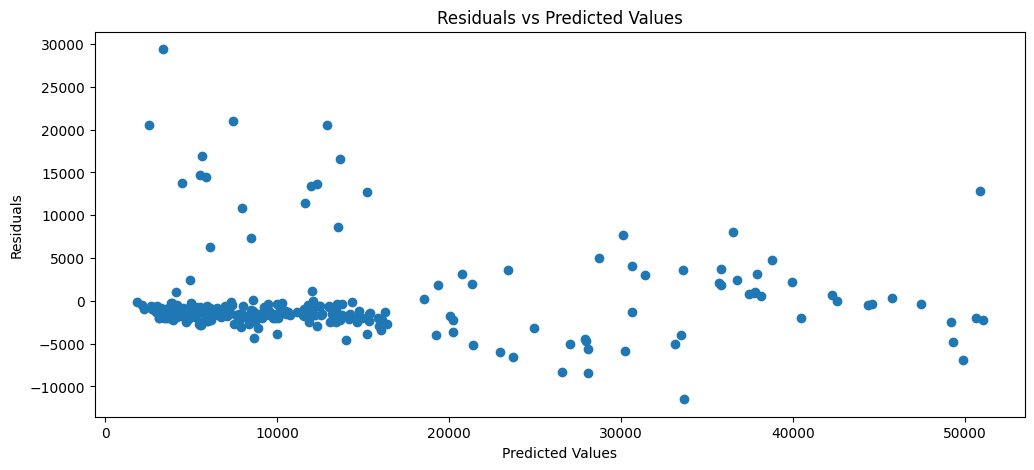

In [26]:
# Feature importance for the recommended model (Polynomial Regression)
feature_names = poly.get_feature_names_out(X.columns)
feature_importance = pd.DataFrame({'feature': feature_names,
                                   'importance': abs(lr_poly.coef_)})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Features Affecting Insurance Charges')
plt.show()

# Partial dependence plots
from sklearn.inspection import PartialDependenceDisplay

# Find the indices of the original features in the polynomial features
features = ['age', 'bmi', 'children']
feature_indices = [list(feature_names).index(feat) for feat in features]

fig, ax = plt.subplots(figsize=(15, 5), ncols=3)
PartialDependenceDisplay.from_estimator(lr_poly, X_train_poly, feature_indices, feature_names=feature_names, ax=ax)
plt.tight_layout()
plt.show()

# Residual analysis
plt.figure(figsize=(12, 5))
plt.scatter(lr_poly.predict(X_test_poly), y_test - lr_poly.predict(X_test_poly))
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### 4.1 Insights and Key findings regarding the project objectives

1. Smoking status is the most significant factor influencing insurance charges, with smokers facing substantially higher costs.
2. Age and BMI also play important roles in determining insurance charges, with older individuals and those with higher BMI generally facing higher costs.
3. There are significant interaction effects, particularly between smoking status and age/BMI, suggesting that the impact of smoking on insurance costs increases with age and BMI.
4. The number of children/dependents has a moderate impact on insurance costs, with costs generally increasing with more dependents.
5. Regional differences exist, but they're less impactful than individual health factors.
6. The model explains a large portion of the variance in insurance charges (high R-squared), indicating that these factors are indeed strong predictors of insurance costs.
7. The residual plot shows some heteroscedasticity, suggesting that the model's accuracy varies across different predicted values.

### 4.2 Model Limitations
While the model provides valuable insights, it has several limitations that should be addressed in future work:

1. Limited features: The dataset lacks detailed health information (e.g., blood pressure, cholesterol levels) that could improve predictive accuracy.
2. Potential non-linear relationships: While polynomial regression captures some non-linearity, more complex relationships might exist that our model doesn't capture.
3. Temporal aspects: The data is cross-sectional, not accounting for how insurance costs change over time for individuals.
4. Ethical considerations: Using features like gender or region in insurance pricing may raise ethical concerns about fairness and discrimination.
5. Outliers and extreme values: The model might be sensitive to outliers, particularly in the high-cost range.

# 5. Next Steps


### **5.1 Revisiting the analysis: a plan of action**

The following plan is recomended to improve predictive accuracy, address potential biases, and enhance the model's practical applicability in the insurance industry.

1. Enhance data collection:
  * Gather more detailed health metrics and lifestyle factors.
  * Include socio-economic indicators and longitudinal data.
2. Explore advanced modeling techniques:
  * Implement ensemble methods (Random Forests, Gradient Boosting).
  * Apply deep learning models for complex pattern recognition.
3. Refine model performance:
  * Conduct comprehensive hyperparameter tuning.
  * Implement robust regression and outlier handling techniques.
4. Ensure model fairness and generalizability:
  * Develop fairness-aware models to ensure equitable pricing.
  * Validate on diverse external datasets.
5. Leverage domain expertise:
  * Collaborate with actuaries and healthcare professionals.
  * Incorporate industry-specific risk factors and regulations.

## <h5 align="center"> **Thank you for your time and attention.** <h5/>



## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
